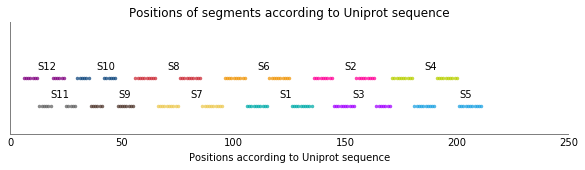

S1_scaled 126087 60848 58147
S2_scaled 123219 83062 46229
S3_scaled 95082 69492 48530
S4_scaled 69220 63988 44368
S5_scaled 100509 73194 51319
S6_scaled 84037 64581 45635
S7_scaled 26377 16188 4315
S8_scaled 73806 59477 46328
S9_scaled 84245 81084 30862
S10_scaled 80233 63528 29965
S11_scaled 37422 34684 16857
S12_scaled 63825 57857 33275
1891 unique mutations across all segments
238 natural unique mutations across all segments
There are 231 single mutations with known effects. They are found in 120 positions


Now the following variables are available:

- data: all data as a (sorted) dictionary in the form: 'segment_name': 'segment_data_as_pandas_dataframe'

- unique_single_mutations: a dictionary with all single mutations for every segment

- data_singles: a sorted dictionary in the form: 'segment_name': 'segment_data_as_pandas_dataframe' for genotypes containing a single substitution

- single_mut_fitness_dict: a dictionary in the form: 'single mutation' : 'fitness'

- data_known_mu

/Users/karen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [40]:
import itertools
import sys
%run 'ks01_Data_import.ipynb'
notebook_prefix = 'ks04'
image_counter = Counter()
from IPython.html.widgets.widget_float import FloatProgress

## Epistasis calculated for every genotype based on fitness of single mutants

#### Different segments

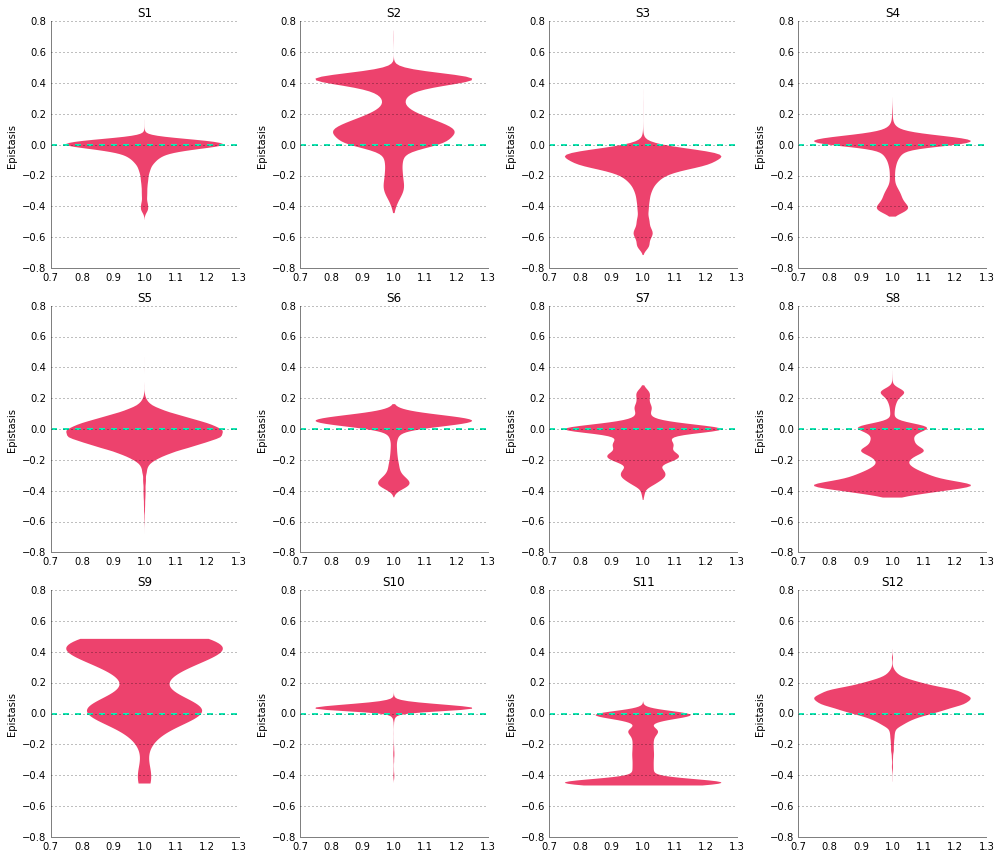

In [93]:
plot_better(width=14, height=12)
title = 'Distribution of epistasis in different segments'
facecolor = '#E91348'
edgecolor = 'none'
zero_color = '#13e9b4'
for index, item in enumerate(data_known_mutations_only.items()):
    segment_name, segment = item
    ax = plt.subplot(3,4,index+1)
    plt.title(segment_name.split('_')[0])
    vplot = plt.violinplot(segment.epistasis.values, showmeans=False, showmedians=False, showextrema=False)
    for patch in vplot['bodies']:
        patch.set_facecolor(facecolor)
        patch.set_alpha(0.8)
        patch.set_edgecolor(edgecolor)
    plt.axhline(0., ls='--', color=zero_color, lw=2)
    improve_plot(ax, grid='y')
    plt.ylabel('Epistasis')
    plt.ylim(-0.8, 0.8)
# plt.suptitle(title, fontsize=18)
plt.tight_layout()
save_image(image_counter, title, figures_folder, notebook_prefix)

In [94]:
# create a dictionary here!
singles_summary = OrderedDict()

for segment_name, segment_data in data_known_mutations_only.items():
    title = 'Epistasis plots for every single mutation segment %s' %segment_name.split('_')[0]
    single_mutations = sorted(list(set(':'.join(segment_data.mut_list_Scer.values).split(':'))))
    total_subplots = len(single_mutations)
    number_of_rows = total_subplots/4+1
    plot_better(width=14, height=4*number_of_rows)
    for index, mutation in enumerate(single_mutations):
        genotypes_with_current_mutation = segment_data[segment_data.mut_list_Scer.str.contains(mutation)] #buggy!
        singles_summary[mutation] = {'fitness': single_mut_fitness_dict[mutation]}
        ax = plt.subplot(number_of_rows,4,index+1)
        plt.title('%s genotypes\ncontaining mutation %s\n(fitness of single mutant: %.2f)' 
                  %(len(genotypes_with_current_mutation), mutation, single_mut_fitness_dict[mutation]))
        vplot = plt.violinplot(genotypes_with_current_mutation.epistasis.values, showmeans=False, showmedians=False, showextrema=False)
        for patch in vplot['bodies']:
            patch.set_facecolor(facecolor)
            patch.set_alpha(0.8)
            patch.set_edgecolor(edgecolor)
        plt.axhline(single_mut_fitness_dict[mutation], ls='--', color='#ffd700', lw=3)
        improve_plot(ax, grid='y')
        plt.ylabel('Epistasis')
        plt.ylim(-0.8, 0.8)
    plt.tight_layout()
    save_image(image_counter, title, figures_folder, notebook_prefix)
    plt.close()

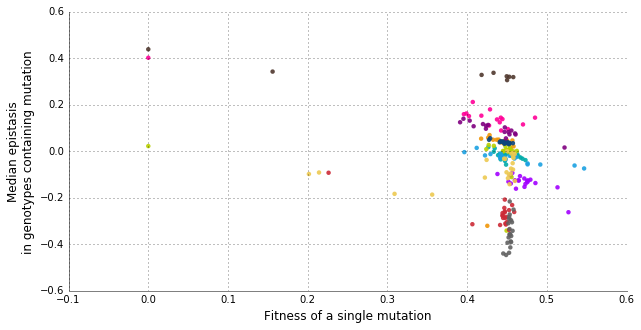

In [98]:
title = 'Fitness of a single mutation vs epistasis'
plot_better()
for single_fitnesses, median_epistasis, segment_name in single_fitness_vs_epistasis:
    plt.scatter(single_fitnesses, median_epistasis, 
                edgecolors='none', alpha=0.9, color=segment_colors[segment_name.split('_')[0]])
plt.xlabel('Fitness of a single mutation', fontsize=12)
plt.ylabel('Median epistasis\nin genotypes containing mutation', fontsize=12)
# plt.xlim(0.38,0.5)
save_image(image_counter, title, figures_folder, notebook_prefix)

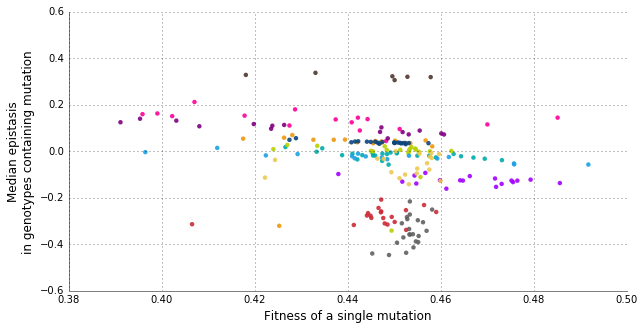

In [96]:
title = 'Fitness of a single mutation vs epistasis'
plot_better()
for single_fitnesses, median_epistasis, segment_name in single_fitness_vs_epistasis:
    plt.scatter(single_fitnesses, median_epistasis, 
                edgecolors='none', alpha=0.9, color=segment_colors[segment_name.split('_')[0]])
plt.xlabel('Fitness of a single mutation', fontsize=12)
plt.ylabel('Median epistasis\nin genotypes containing mutation', fontsize=12)
plt.xlim(0.38,0.5)
save_image(image_counter, title, figures_folder, notebook_prefix)

## Epistasis calculated every pair of mutations based on foursomes wt >mutA, mutB > mutAB

#### Calculating foursomes and saving them as files

In [53]:
foursome_directory = '/Users/karen/Downloads/foursomes_nat/' # requires much space so storing locally

for segment in data:
    if segment == 'S7_scaled':
        # preparing the dataset
        data_subset = data_natural[segment].copy() # natural only!
        data_subset['mut_list_Scer'].fillna('', inplace=True)
        data_subset['wt'] = data_subset['mut_list_Scer']

        # preparing the list of combinations of mutations
        single_mutations = sorted(list(unique_single_mutations[segment]), key= lambda m: (int(m[:-1]), m[-1]))
        mut_combinations = [pair for pair in list(itertools.combinations(single_mutations, 2)) if pair[0][:-1] != pair[1][:-1]]

        print 'Calculating segment %s...' %segment
        print len(mut_combinations), 'combinations of single mutations'

        prefix = 'segment%s__' % segment.split('_')[0]
        get_foursomes_for_every_pair(data_subset, mut_combinations, prefix, foursome_directory)

        print 'Segment %s is done\n' % segment
        break

Calculating segment S7_scaled...
11796 combinations of single mutations
Segment S7_scaled is done



#### Reading foursomes from files, calculating epistasis and other parameters

In [94]:
ep_dict = {}
directory = '/Users/karen/Downloads/foursomes_nat/'
for f in os.listdir(directory):
    if '.hdf' in f:
        mutA, mutB = f.rstrip('.hdf').split('_')[-3], f.rstrip('.hdf').split('_')[-1]
        if mutA in natural_unique_single_mutations['S7_scaled'] and mutB in natural_unique_single_mutations['S7_scaled']:
            foursome = pd.read_hdf(directory + f, 'data')
            ep = foursome['wild_type']['mut_list_Scer'].apply(lambda wt: foursome_epistasis(foursome, wt))
            mutA_impacts = foursome['mutA']['s'] - foursome['wild_type']['s']
            mutB_impacts = foursome['mutB']['s'] - foursome['wild_type']['s']
            mutAB_impacts = foursome['mutAB']['s'] - foursome['wild_type']['s']
            ep_dict[mutA, mutB] = foursome, ep, mutA_impacts, mutB_impacts, mutAB_impacts

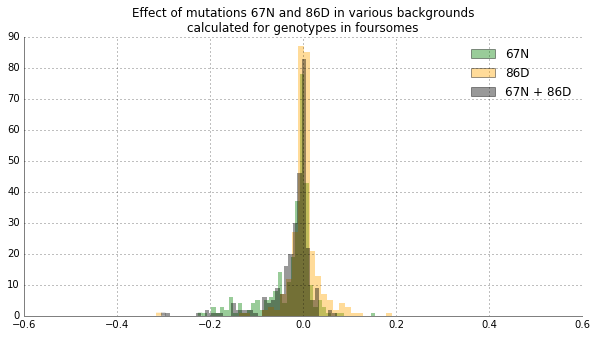

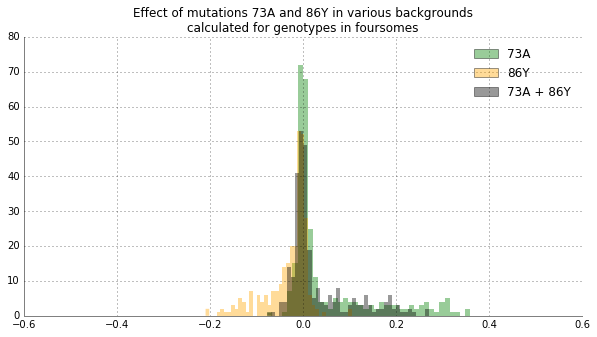

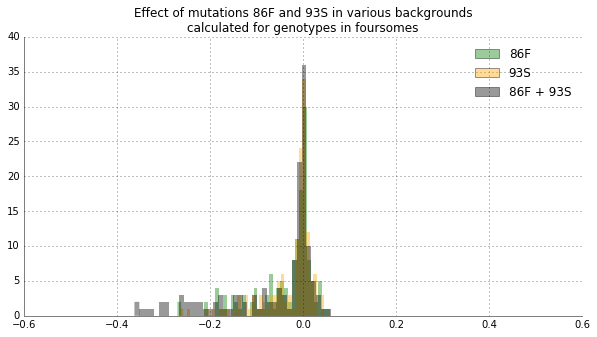

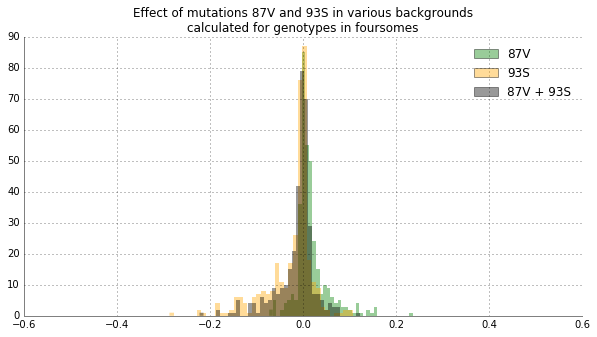

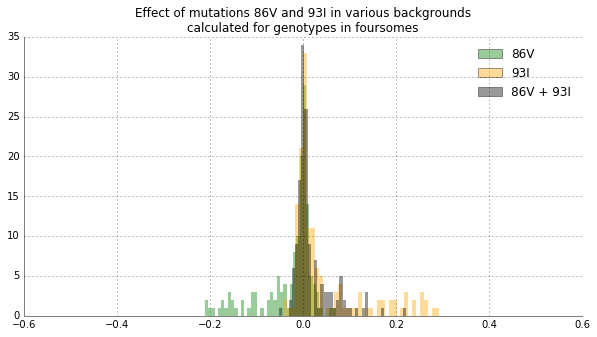

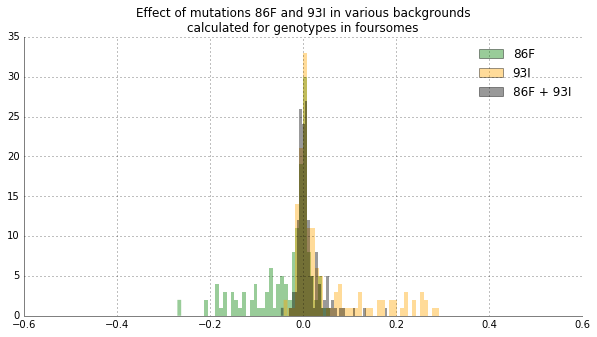

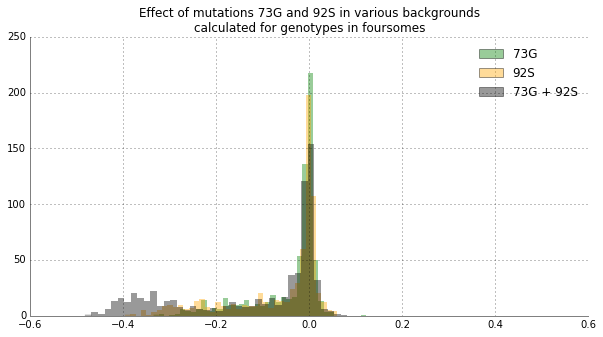

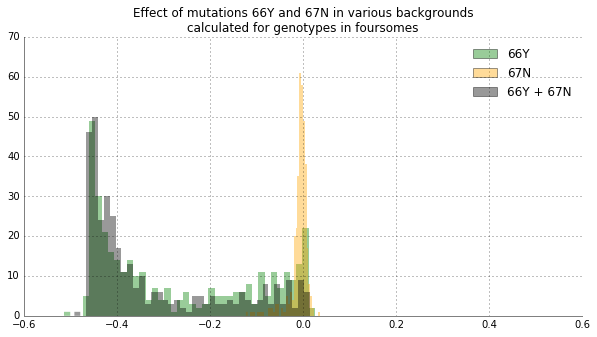

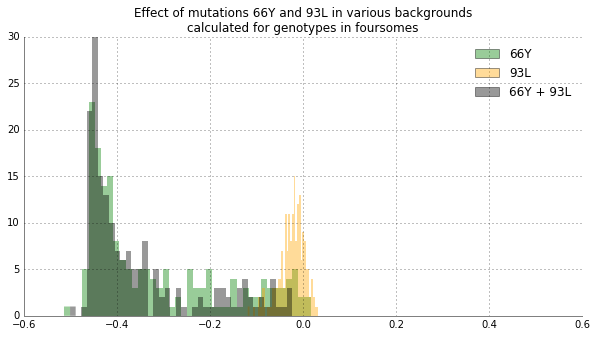

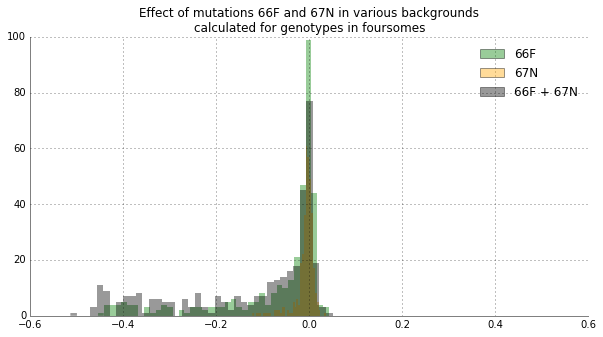

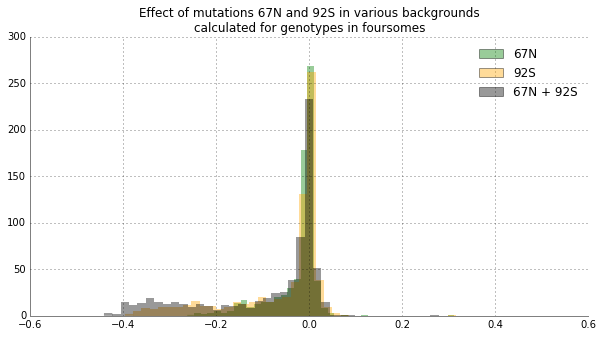

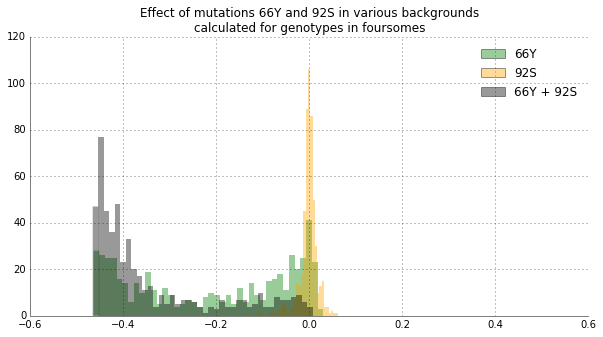

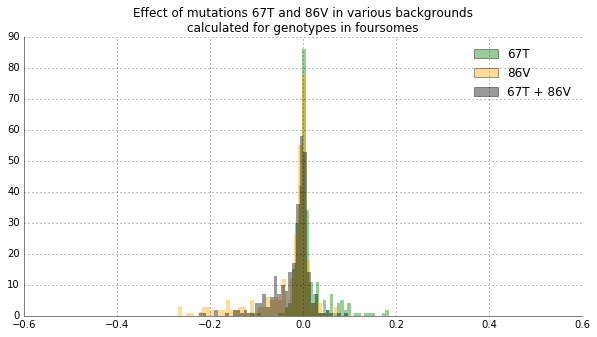

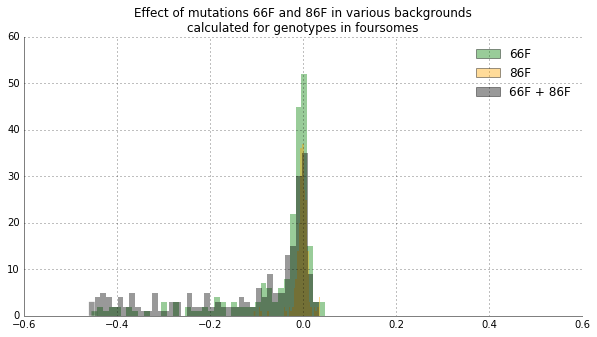

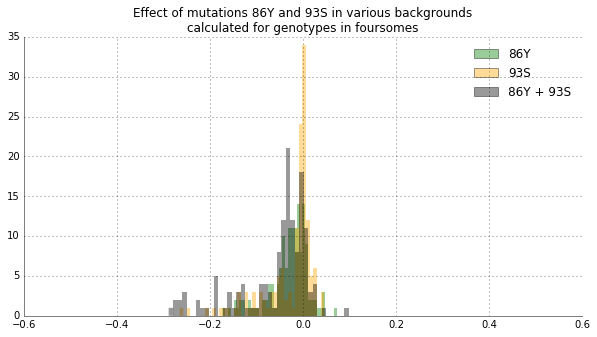

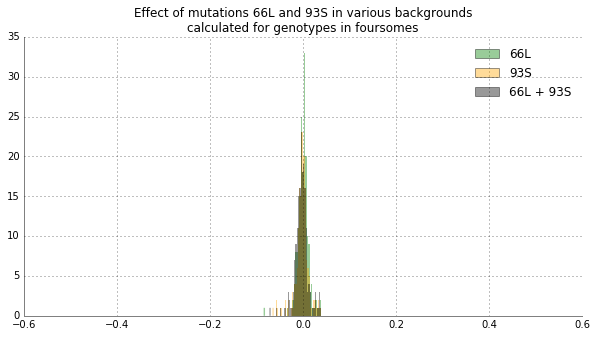

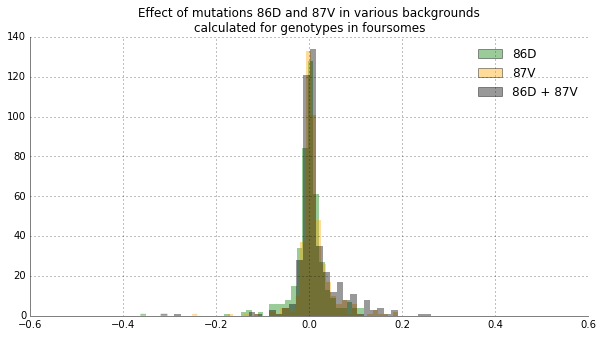

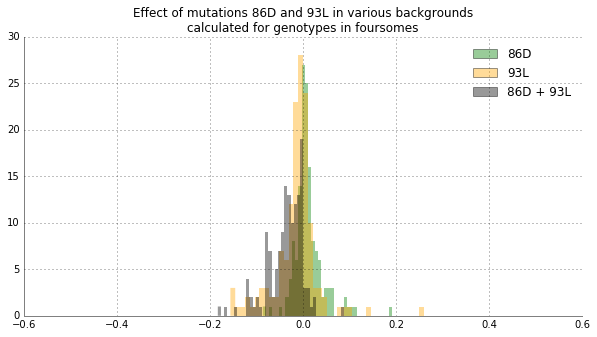

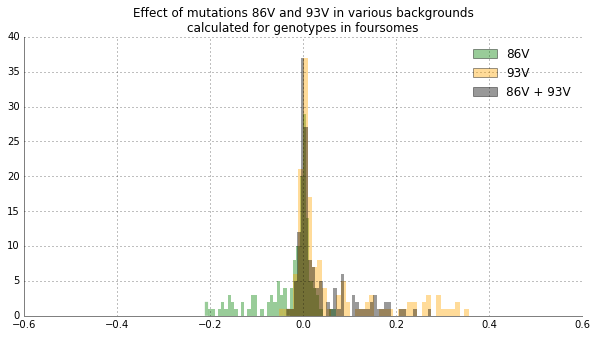

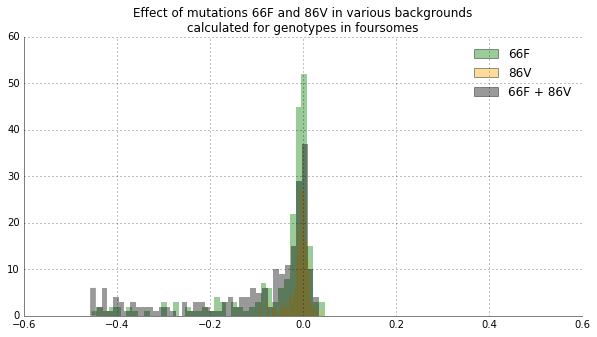

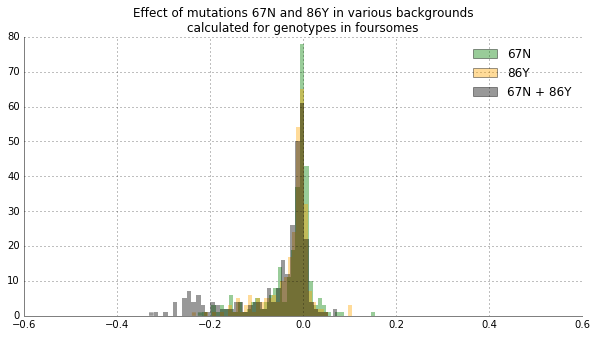

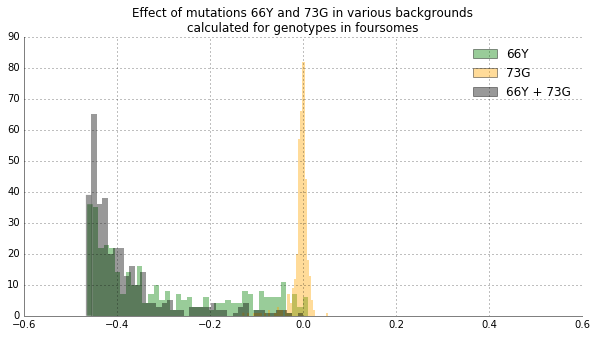

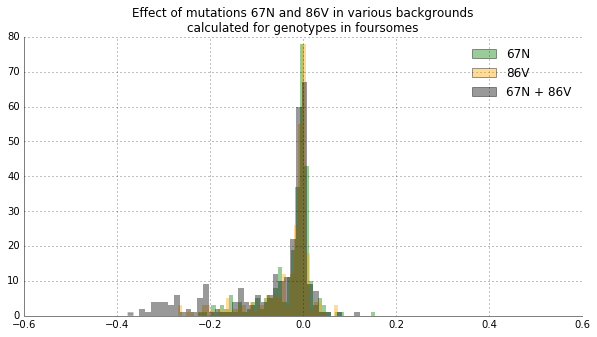

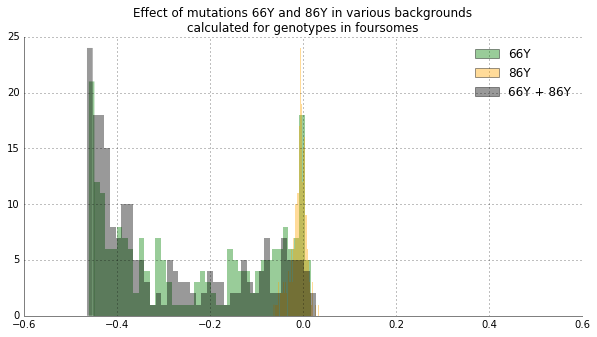

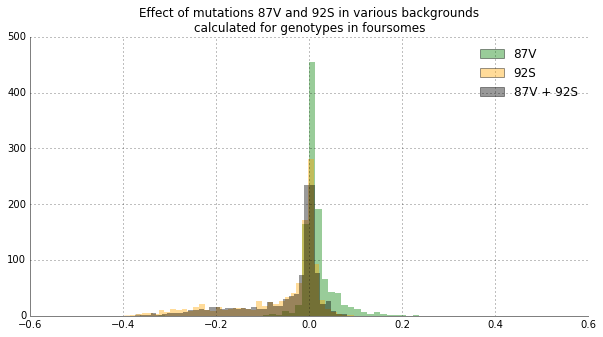

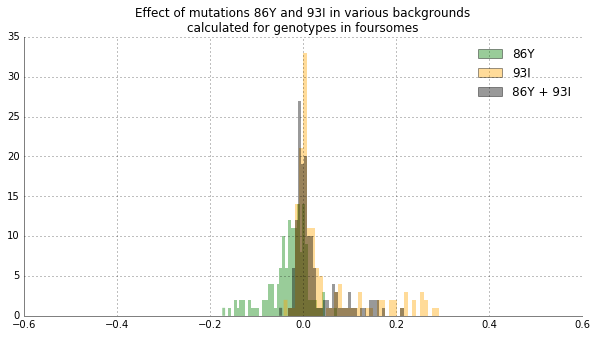

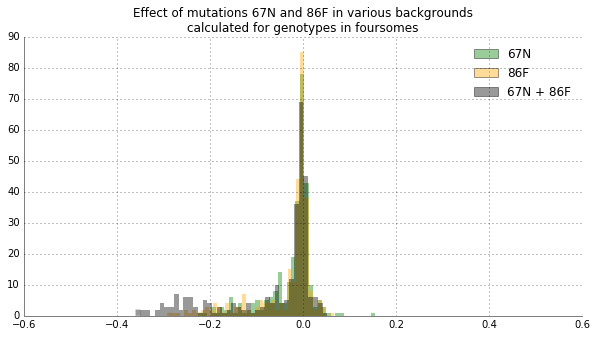

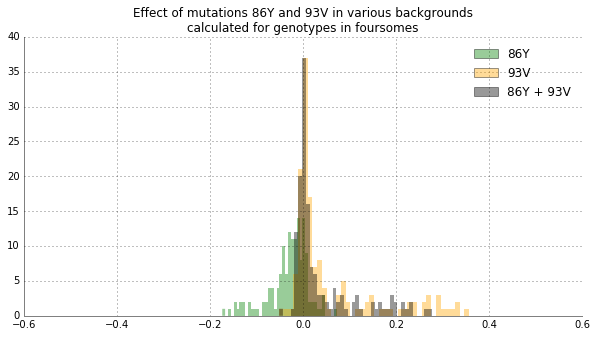

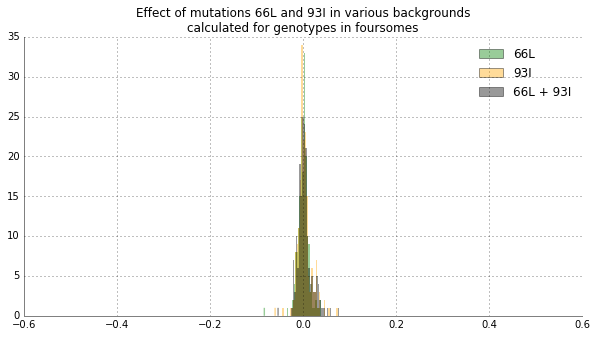

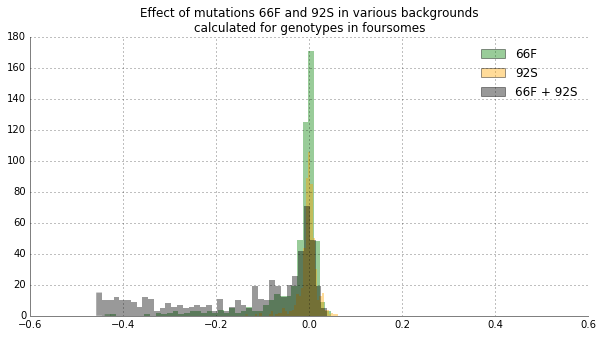

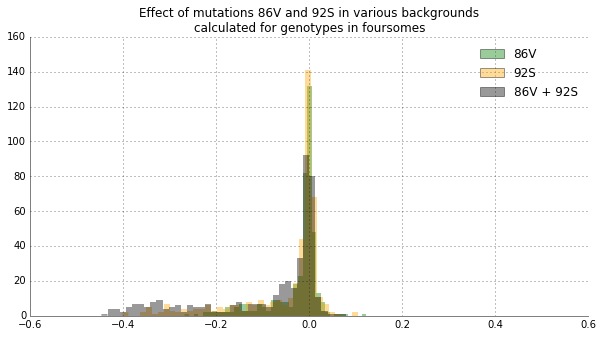

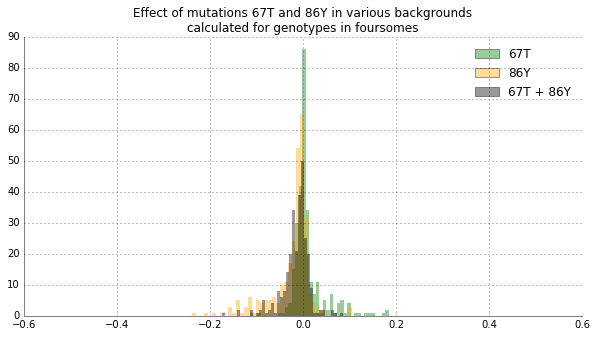

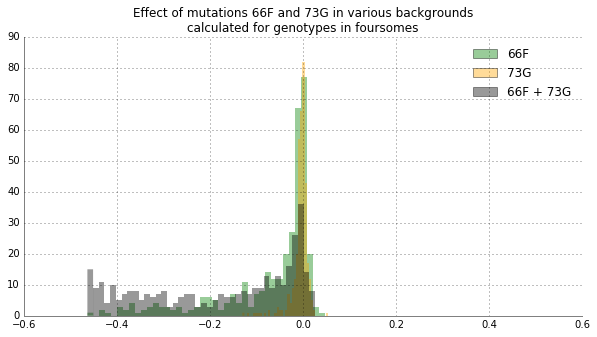

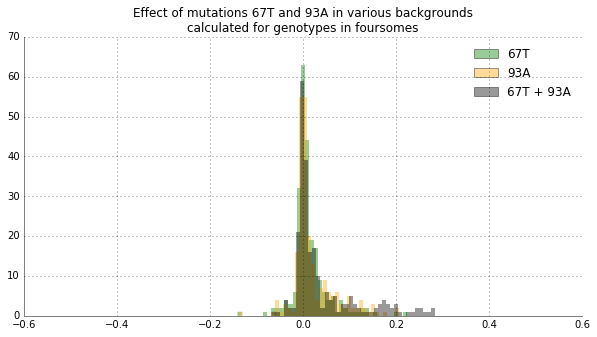

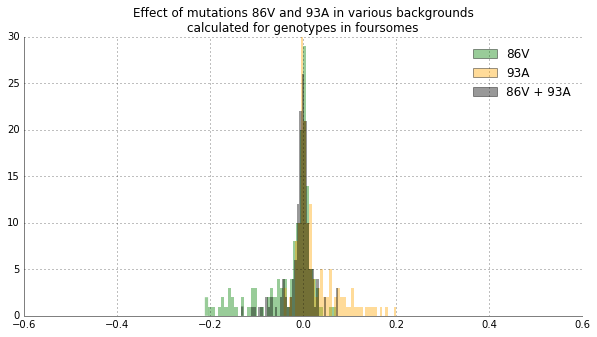

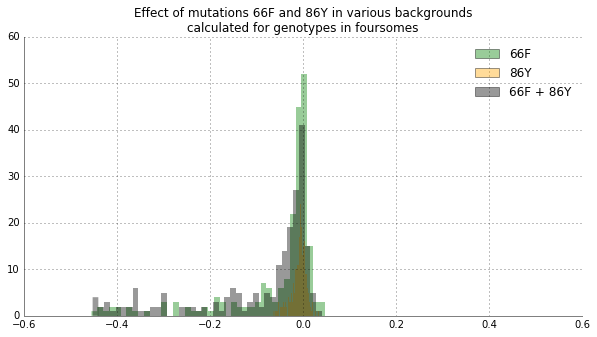

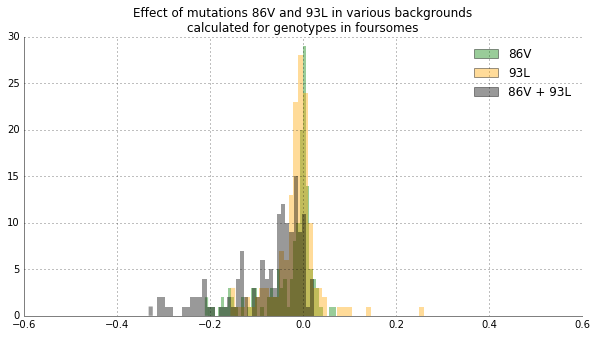

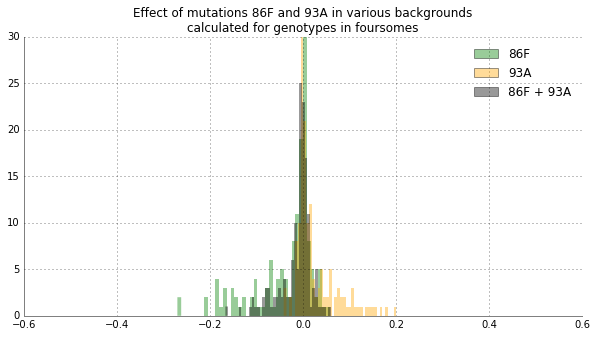

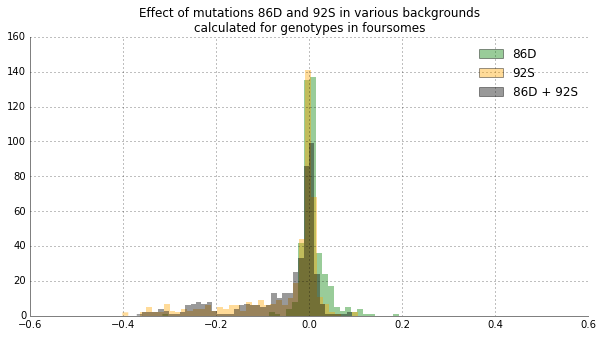

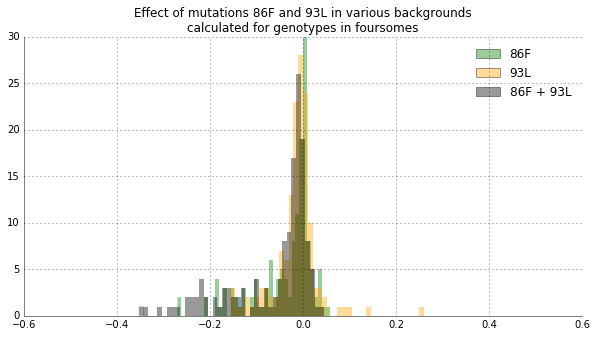

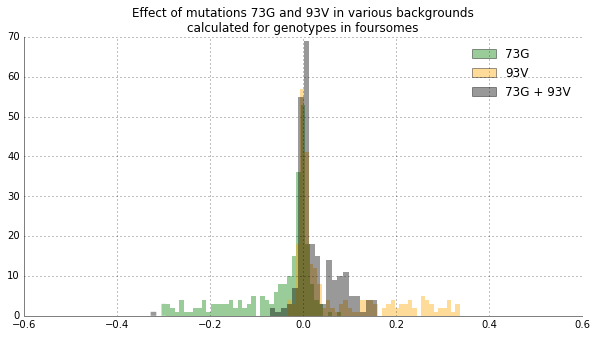

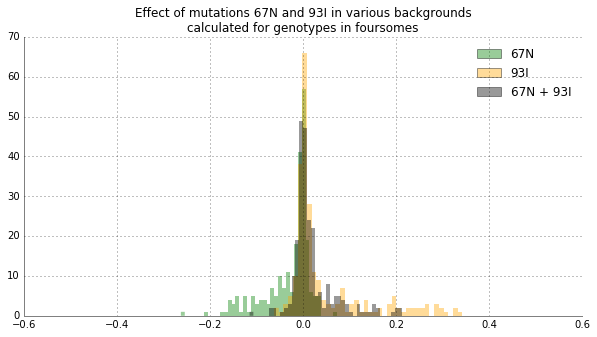

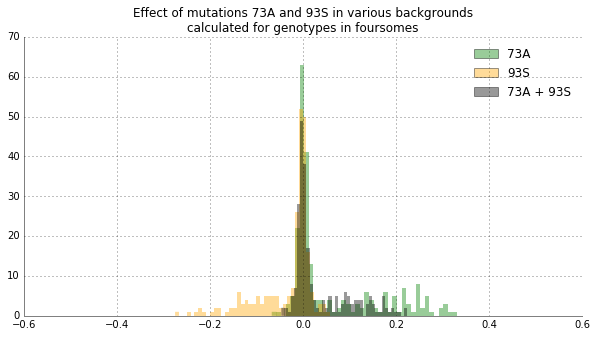

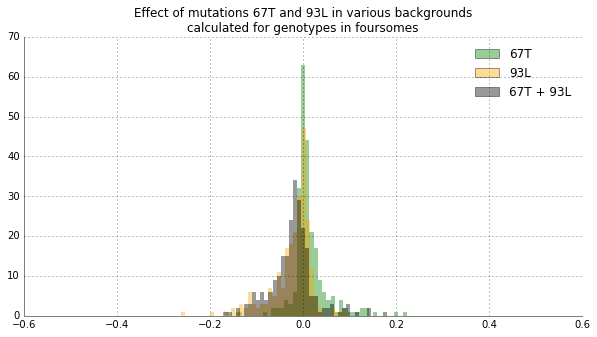

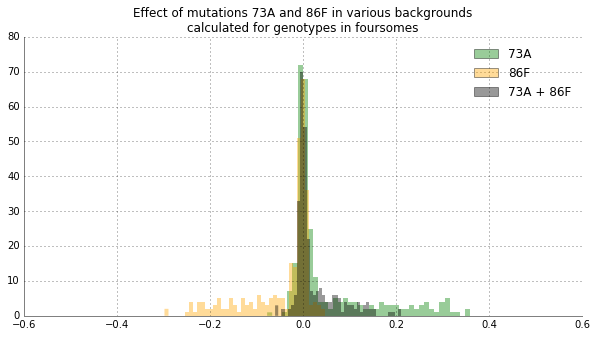

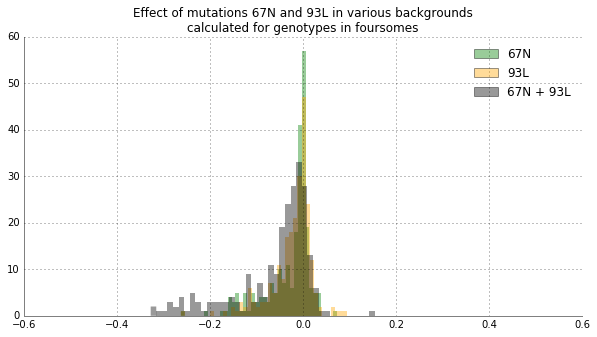

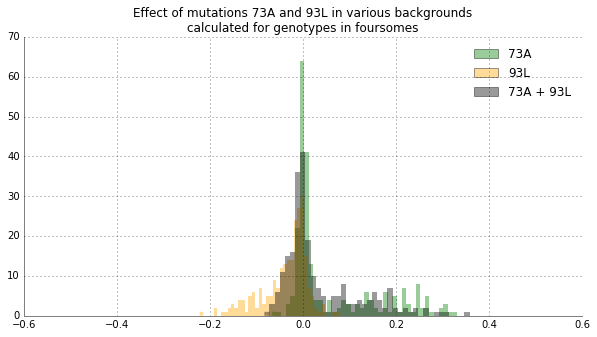

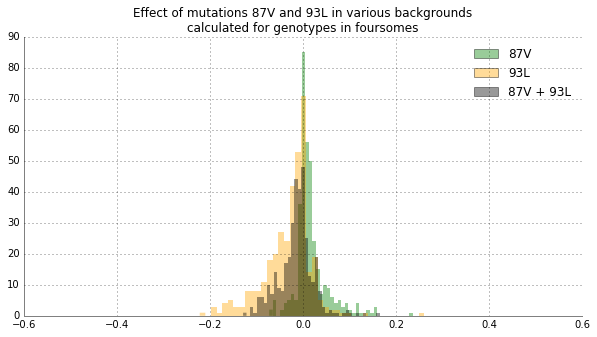

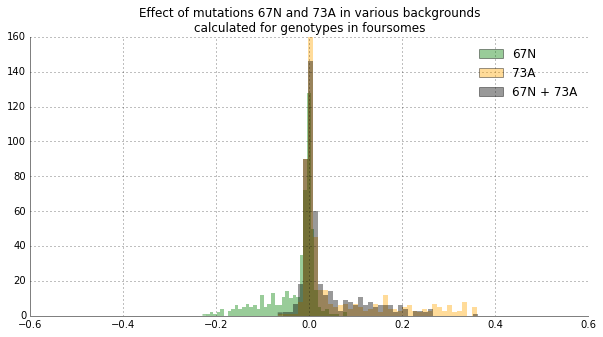

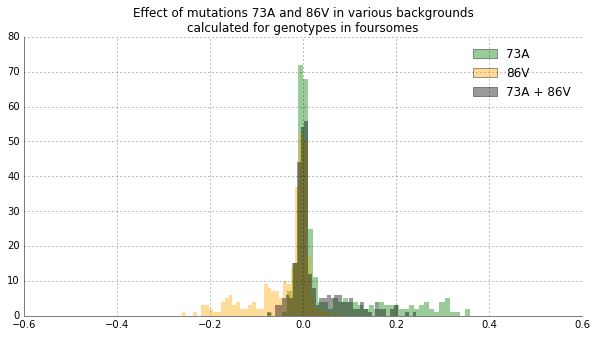

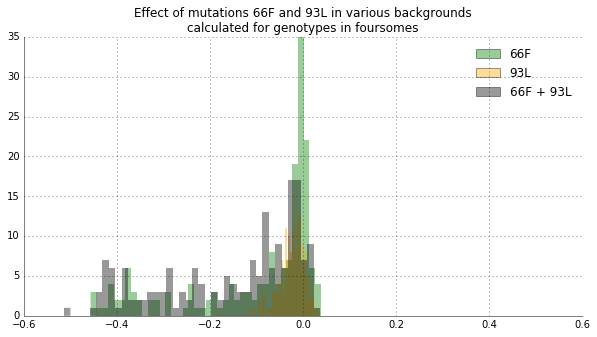

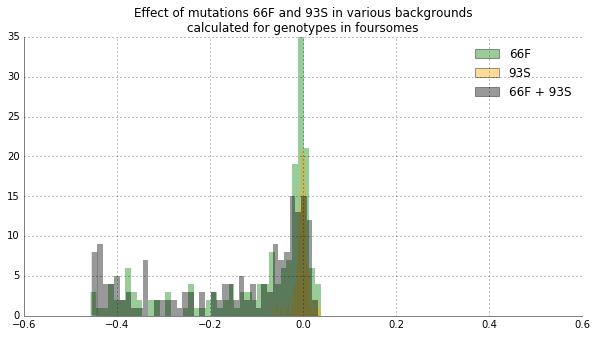

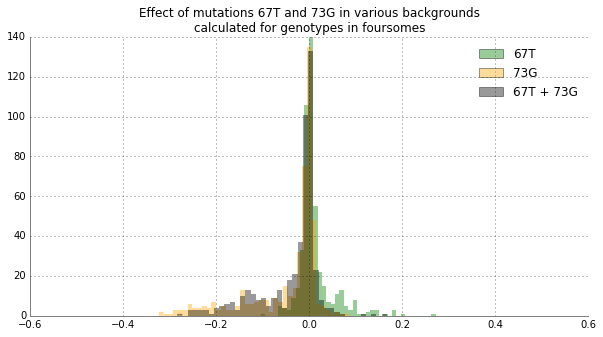

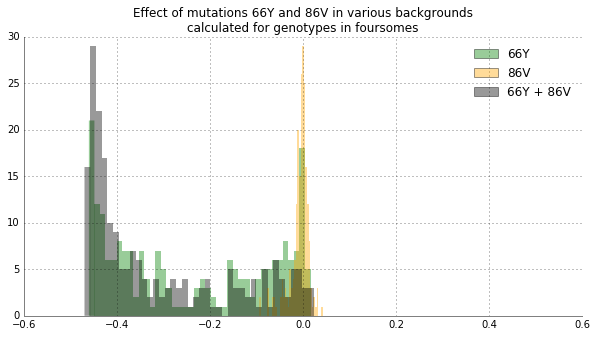

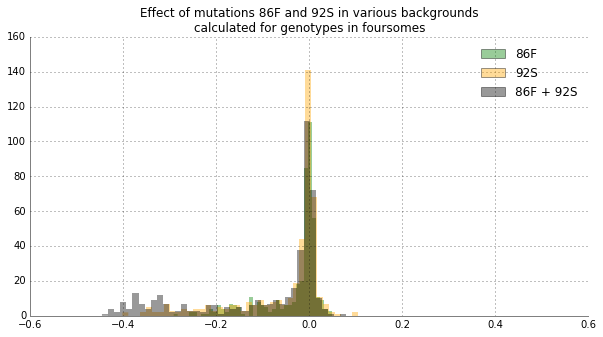

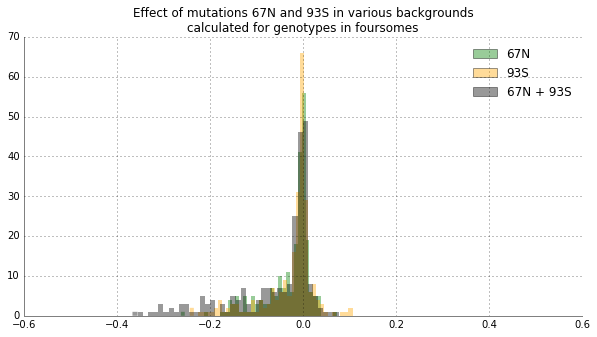

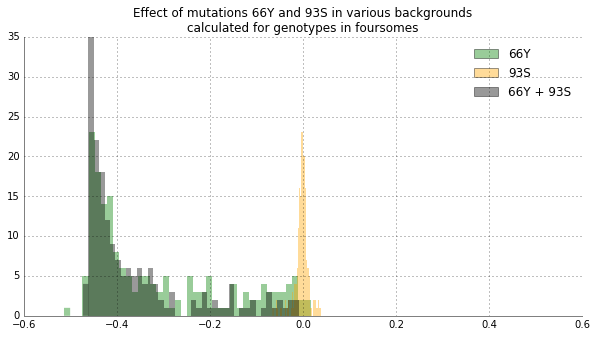

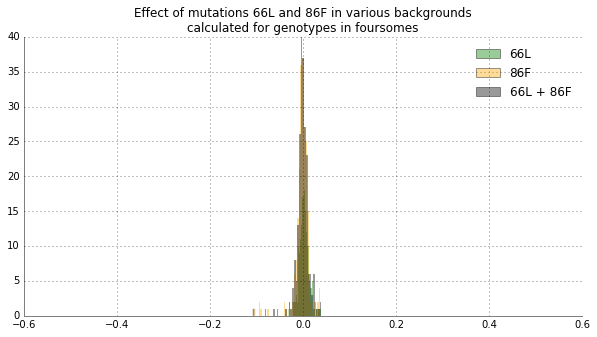

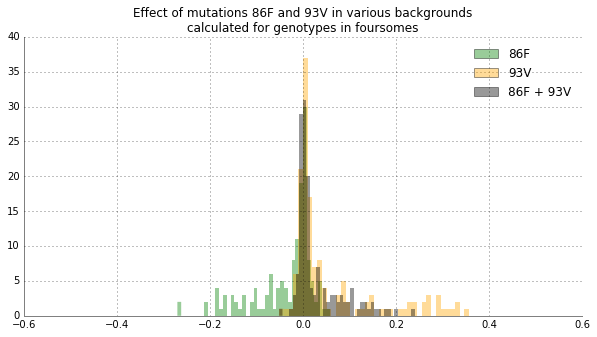

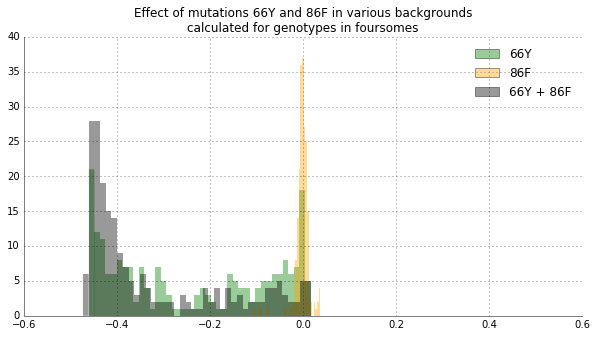

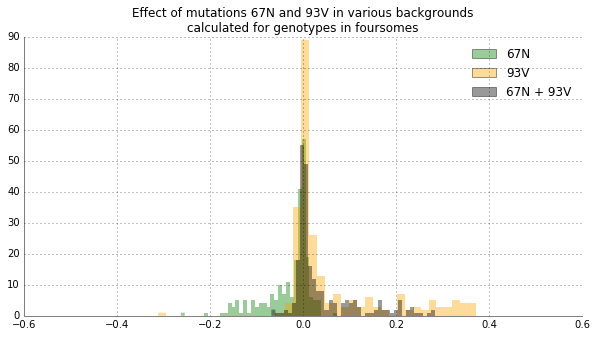

In [110]:
counter = 0
mutAB_color = 'black'
for mutA, mutB in ep_dict:
    title = 'Effect of mutations %s and %s in various backgrounds\ncalculated for genotypes in foursomes' %(mutA, mutB)
    mutA_impacts, mutB_impacts, mutAB_impacts = ep_dict[mutA, mutB][2:]
    if mutAB_impacts.mean() / np.mean([mutA_impacts.mean(), mutB_impacts.mean()]) > 2.:
        counter += 1
        plot_better()
        plt.title(title)
        plt.hist(mutA_impacts, edgecolor='none', bins=40, label=mutA, color=mutA_color, alpha=alpha);
        plt.hist(mutB_impacts, edgecolor='none', bins=40, label=mutB, color=mutB_color, alpha=alpha);
        plt.hist(mutAB_impacts, edgecolor='none', bins=40, label='%s + %s' %(mutA, mutB) , color=mutAB_color, alpha=alpha);
        plt.legend(frameon=False)
        plt.xlim(-0.6, 0.6)
        if counter > 100:
            break

#### Plotting

In [57]:
alpha = 0.4
wt_color = 'magenta'
mutA_color = 'green'
mutB_color = 'orange'

foursomes_folder = os.path.join(figures_folder, 'foursomes_nat')
for k,v in ep_dict.items():
    foursome, ep, mutA_impacts, mutB_impacts  = v
    plot_better()
    plt.scatter(foursome['wild_type']['s'].values, ep.values, edgecolor='none', color='black', alpha=0.05);
    title = 'Epistasis in foursomes with mutations %s and %s' %(k[0], k[1])
    plt.title(title + '\nN = %s' %len(foursome['wild_type']))
    plt.axvline(wt_fitness, color=wt_color, alpha=alpha)
    plt.text(0.52, 0.42, 'wild type', color=wt_color, alpha=alpha)
    plt.axhline(0, color='gray', alpha=0.4)
    
    plt.axvline(wt_fitness + mutA_impacts.median(), color=mutA_color, ls='-', alpha=alpha)
    plt.axvline(wt_fitness + mutB_impacts.median(), color=mutB_color, ls='-', alpha=alpha)

    try:
#         plt.axvline(single_mut_fitness_dict[k[0]], color=mutA_color, alpha=alpha)
#         plt.axvline(single_mut_fitness_dict[k[1]], color=mutB_color, alpha=alpha)
        plt.text(0.52, 0.52, 'median impact of %s' % k[0], color=mutA_color, alpha=alpha)
        plt.text(0.52, 0.47, 'median impact of %s' % k[1], color=mutB_color, alpha=alpha)
    except:
        pass
    plt.xlim(0, 0.6)
    plt.ylim(-0.6, 0.6)
    plt.xlabel('Fitness of a "wild type" combination')
    plt.ylabel('Epistasis in a foursome')
    save_image(image_counter, title, foursomes_folder, notebook_prefix)
    plt.close()

In [ ]:
plot_better()
for k,v in ep_dict.items():
    mutA, mutB = k
    foursome, ep, mutA_impacts, mutB_impacts  = v
    try:
        plt.scatter(single_mut_fitness_dict[mutA], mutA_impacts.median(), edgecolor='none', alpha=0.1)
        plt.scatter(single_mut_fitness_dict[mutB], mutB_impacts.median(), edgecolor='none', alpha=0.1)
    except KeyError:
        pass

In [70]:
ep_dict['66F', '93V'][0]['wild_type']['s']
# ep_dict['66F', '93V'][0].major_xs('73G:86D:92S').loc['s']

mutA         0.0948244
mutAB          0.44417
mutB          0.461698
wild_type     0.513899
Name: s, dtype: object

In [81]:
subset = data_natural['S7_scaled'].copy()
subset.mut_list_Scer.fillna('', inplace=True)
subset[subset.mut_list_Scer.str.contains('66F')][['mut_list_Scer', 's']]#.sort_values('s')

,mut_list_Scer,s
77,66F:73A:86D:92S:93A,0.456851
78,66F:73A:86D:92S:93I,0.461409
79,66F:73A:86D:92S:93L,0.380976
80,66F:73A:86D:92S:93S,0.453280
81,66F:73A:86D:92S,0.458602
82,66F:73A:86D:92S:93V,0.458378
84,66F:73A:86D:93A,0.467170
85,66F:73A:86D:93I,0.461361
86,66F:73A:86D:93L,0.455240
87,66F:73A:86D:93S,0.456540
